In [1]:
%matplotlib inline

In [2]:
from PIL import Image
import cv2 
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt


In [3]:
import glob, os

laser_samples = []
os.chdir("../res/calibration_theta/")
for file in glob.glob("*"):
    laser_samples.append(file)

In [4]:
def disp_file(path):
    # In OpenCV, images are in BGR
    # In Pillow, images are in RGB 
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    img = cv2.resize(img, (480, 360))
    display(Image.fromarray(img))

# Display cv2 image
def disp_img(cv_img):
#     cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    cv_img = cv2.resize(cv_img, (480, 360))
    display(Image.fromarray(cv_img))


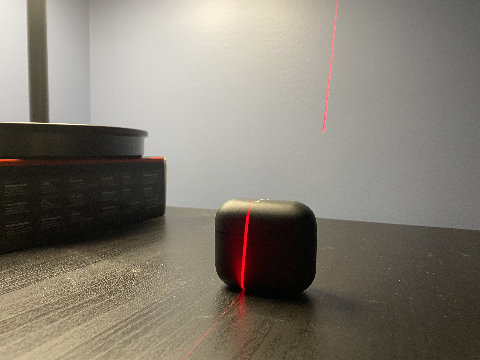

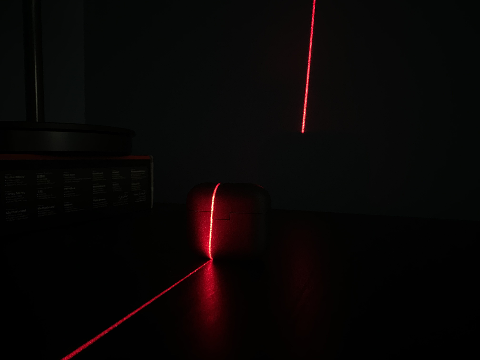

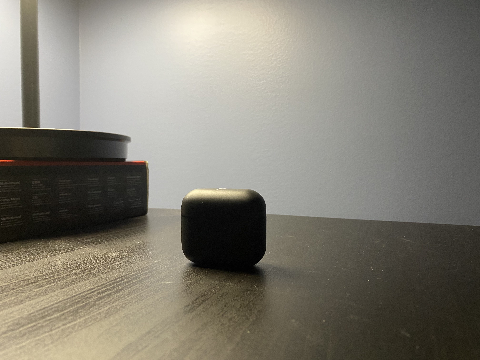

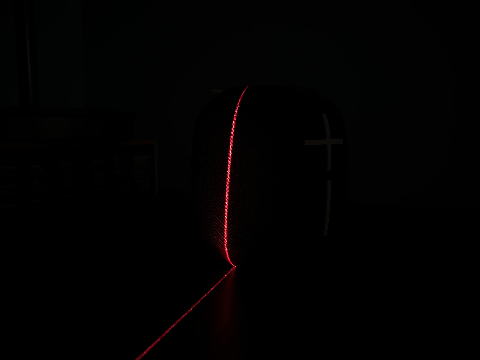

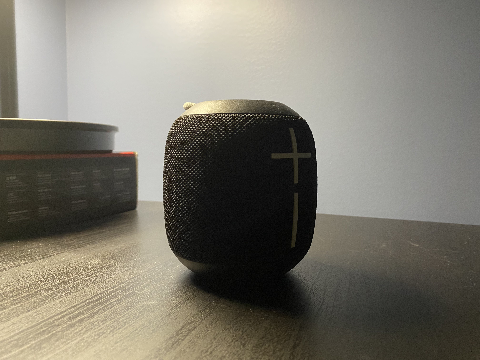

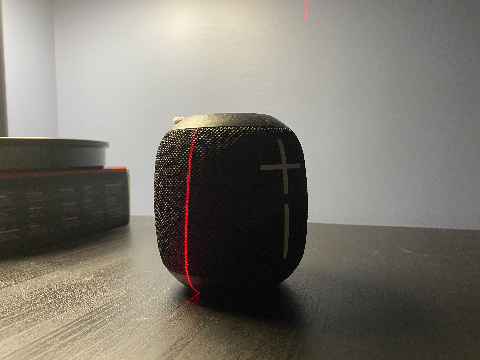

In [5]:
for file in laser_samples:
    disp_file(path=file)

In [37]:
def extract_laser(frame): 
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # define range of blue color in HSV
    lower_colour = np.array([146, 62, 0])
    upper_colour = np.array([255, 255, 255])
    
    # Threshold the HSV image to get only get red colour
    mask = cv2.inRange(hsv, lower_colour, upper_colour)
    
    # Isolate the red channel
    img = frame[...,2]
    ret,img = cv2.threshold(img,230,255,0)

    # Create emptry array of zeros of same size as img
    out = np.zeros_like(img)

    # For each row, get the position of the highest intensity
    bppr = np.argmax(img, axis=1)

    # Set the highest intensity pixel locations to 255
    out[np.arange(bppr.shape[0]), bppr] = 255
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(out,out, mask= mask)
    
    return res, bppr


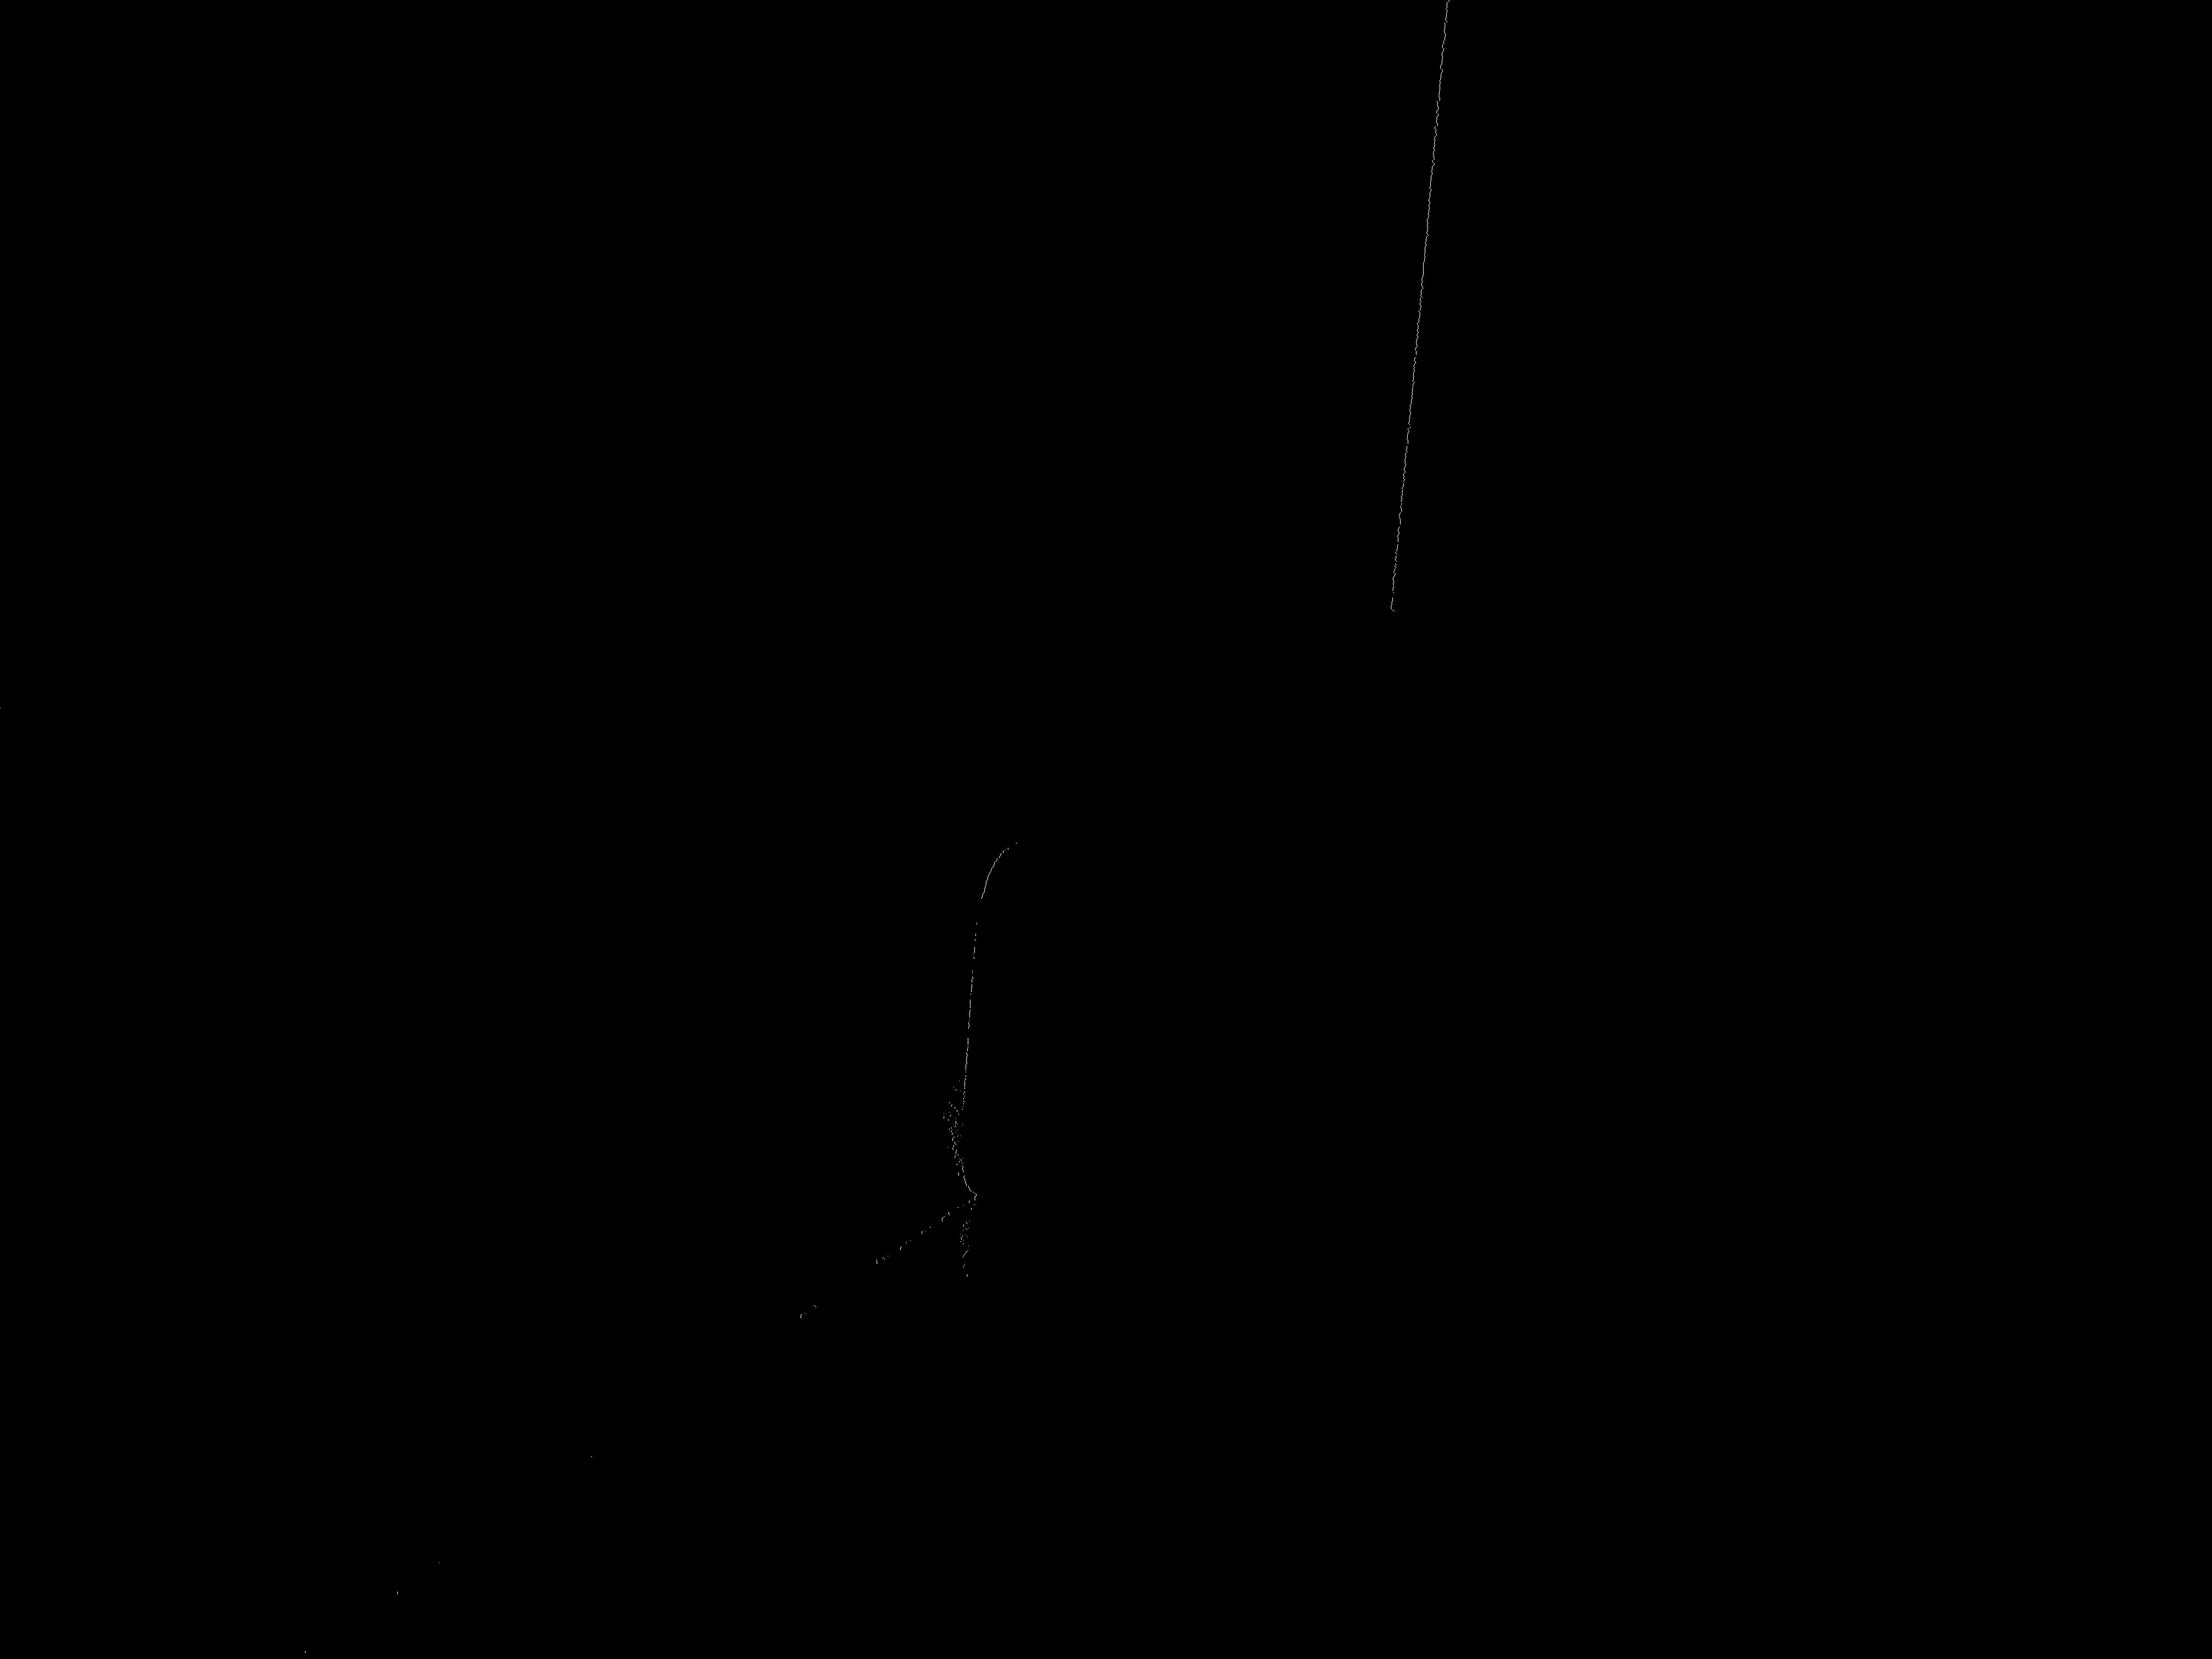

In [38]:
img = cv2.imread(laser_samples[1])
img, POI  = extract_laser(img)

display(Image.fromarray(img))

In [48]:
(h, w) = img.shape
print(w, h)

4032 3024


In [49]:
centre_x = w/2
centre_y = h/2 
print(centre_x, centre_y)

2016.0 1512.0


In [50]:
# Distance from y axis
dist_y = abs(POI - centre_x)

In [ ]:
# Global vars
x = 4 # dist b/w camera and laser in inches
D = np.arange(26, 6, -2) # 26 to 8 
offset = 0 # dist b/w camera and test rig
